In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-taste-test/coffee_survey.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Step 2: load dataset

In [3]:
df = pd.read_csv('/kaggle/input/coffee-taste-test/coffee_survey.csv')

In [4]:
df.head()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
4037,PA44VP,>65 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Regular drip coffee,NaN,...,Less than $20,Yes,Female,NaN,Master's degree,White/Caucasian,NaN,Retired,2,Democrat
4038,vNgpPD,>65 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Regular drip coffee,NaN,...,Less than $20,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Retired,2,Republican
4039,g5ggRM,18-24 years old,1,"At a cafe, At home, On the go, At the office","Espresso, Pod/capsule machine (e.g. Keurig/Nes...",Aeropress,"National chain (e.g. Starbucks, Dunkin), Drive...",NaN,Latte,NaN,...,$300-$500,Yes,Male,NaN,Some college or associate's degree,White/Caucasian,NaN,Employed full-time,NaN,Democrat
4040,rlgbDN,25-34 years old,2,At home,Pour over,NaN,NaN,NaN,Iced coffee,NaN,...,$100-$300,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Unemployed,NaN,Democrat
4041,0EGYe9,25-34 years old,1,At home,"Pour over, French press, Espresso, Other",Aeropress,NaN,NaN,Latte,NaN,...,$500-$1000,Yes,Female,NaN,Doctorate or professional degree,White/Caucasian,NaN,Employed full-time,1,Democrat


# Step 3 : Exploring the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

In [7]:
df.columns

Index(['submission_id', 'age', 'cups', 'where_drink', 'brew', 'brew_other',
       'purchase', 'purchase_other', 'favorite', 'favorite_specify',
       'additions', 'additions_other', 'dairy', 'sweetener', 'style',
       'strength', 'roast_level', 'caffeine', 'expertise',
       'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall', 'wfh', 'total_spend',
       'why_drink', 'why_drink_other', 'taste', 'know_source', 'most_paid',
       'most_willing', 'value_cafe', 'spent_equipment', 'value_equipment',
       'gender', 'gender_specify', 'education_level', 'ethnicity_race',
       'ethnici

In [8]:
df.describe()

,expertise,coffee_a_bitterness,coffee_a_acidity,coffee_a_personal_preference,coffee_b_bitterness,coffee_b_acidity,coffee_b_personal_preference,coffee_c_bitterness,coffee_c_acidity,coffee_c_personal_preference,coffee_d_bitterness,coffee_d_acidity,coffee_d_personal_preference
count,3938.000000,3798.000000,3779.000000,3789.000000,3780.000000,3767.000000,3773.000000,3764.000000,3751.000000,3766.000000,3767.000000,3765.000000,3764.000000
mean,5.693499,2.141127,3.634824,3.310900,3.013228,2.223786,3.068646,3.071998,2.366836,3.064790,2.162729,3.858167,3.375930
std,1.948867,0.947163,0.982113,1.185953,0.992875,0.865389,1.113546,0.999267,0.921048,1.128431,1.081546,1.007973,1.452504
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000
50%,6.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000
75%,7.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
df.isnull()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,False,False,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,True,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,True,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,False,False,False,False,False,True,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
4038,False,False,False,False,False,True,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
4039,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4040,False,False,False,False,False,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False


In [10]:
df.isnull().sum()

submission_id                      0
age                               31
cups                              93
where_drink                       70
brew                             385
brew_other                      3364
purchase                        3332
purchase_other                  4011
favorite                          62
favorite_specify                3928
additions                         83
additions_other                 3994
dairy                           2356
sweetener                       3530
style                             84
strength                         126
roast_level                      102
caffeine                         125
expertise                        104
coffee_a_bitterness              244
coffee_a_acidity                 263
coffee_a_personal_preference     253
coffee_a_notes                  1464
coffee_b_bitterness              262
coffee_b_acidity                 275
coffee_b_personal_preference     269
coffee_b_notes                  1588
c

In [11]:
df[df.duplicated()]

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation


In [12]:
df.shape

(4042, 57)

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(columns=['submission_id'])

,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,additions,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,No - just black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,"Sugar or sweetener, No - just black",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,No - just black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,"No - just black, Cinnamon",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,No - just black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,>65 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Regular drip coffee,NaN,"Milk, dairy alternative, or coffee creamer, Other",...,Less than $20,Yes,Female,NaN,Master's degree,White/Caucasian,NaN,Retired,2,Democrat
4038,>65 years old,2,At home,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Regular drip coffee,NaN,"Milk, dairy alternative, or coffee creamer",...,Less than $20,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Retired,2,Republican
4039,18-24 years old,1,"At a cafe, At home, On the go, At the office","Espresso, Pod/capsule machine (e.g. Keurig/Nes...",Aeropress,"National chain (e.g. Starbucks, Dunkin), Drive...",NaN,Latte,NaN,"No - just black, Milk, dairy alternative, or c...",...,$300-$500,Yes,Male,NaN,Some college or associate's degree,White/Caucasian,NaN,Employed full-time,NaN,Democrat
4040,25-34 years old,2,At home,Pour over,NaN,NaN,NaN,Iced coffee,NaN,"Milk, dairy alternative, or coffee creamer",...,$100-$300,Yes,Male,NaN,Bachelor's degree,White/Caucasian,NaN,Unemployed,NaN,Democrat


In [15]:
age_favorite_distribution = df.groupby(['age', 'favorite']).size().unstack().fillna(0)
age_favorite_distribution

favorite,Americano,Blended drink (e.g. Frappuccino),Cappuccino,Cold brew,Cortado,Espresso,Iced coffee,Latte,Mocha,Other,Pourover,Regular drip coffee
age,,,,,,,,,,,,
18-24 years old,26.0,11.0,32.0,18.0,40.0,38.0,30.0,81.0,21.0,12.0,103.0,36.0
25-34 years old,111.0,14.0,168.0,56.0,172.0,158.0,82.0,347.0,51.0,50.0,566.0,196.0
35-44 years old,75.0,15.0,84.0,26.0,73.0,84.0,29.0,152.0,26.0,22.0,273.0,95.0
45-54 years old,25.0,3.0,31.0,5.0,15.0,27.0,8.0,46.0,11.0,9.0,78.0,41.0
55-64 years old,10.0,1.0,17.0,3.0,8.0,13.0,6.0,32.0,6.0,10.0,38.0,40.0
<18 years old,0.0,1.0,1.0,0.0,0.0,1.0,0.0,8.0,0.0,1.0,5.0,2.0
>65 years old,1.0,0.0,8.0,1.0,2.0,8.0,1.0,13.0,3.0,8.0,17.0,32.0


# Plot stacked bar chart

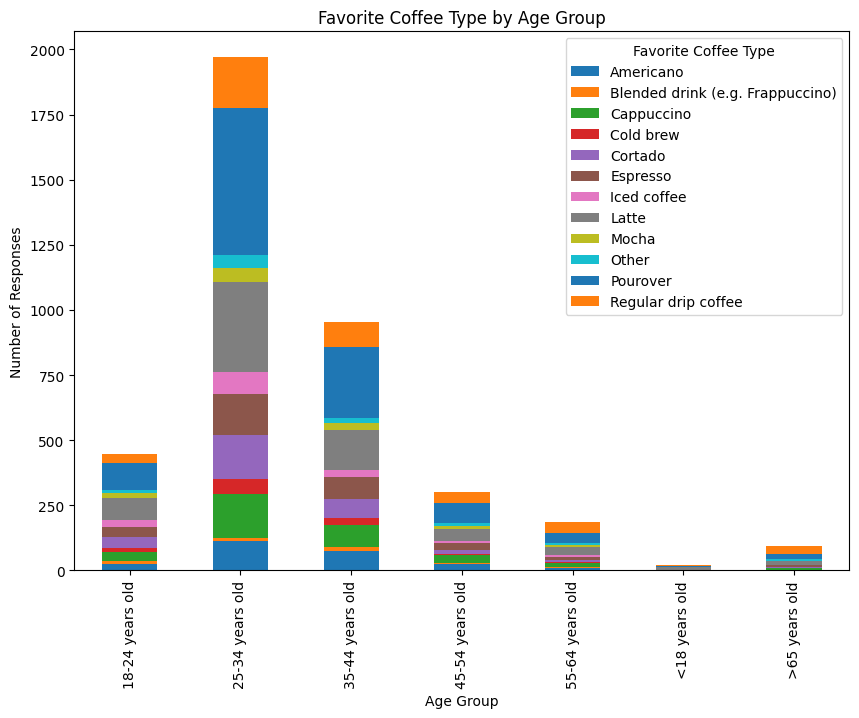

In [16]:
age_favorite_distribution.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Favorite Coffee Type by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.legend(title='Favorite Coffee Type')
plt.show()

# Plot grouped bar chart

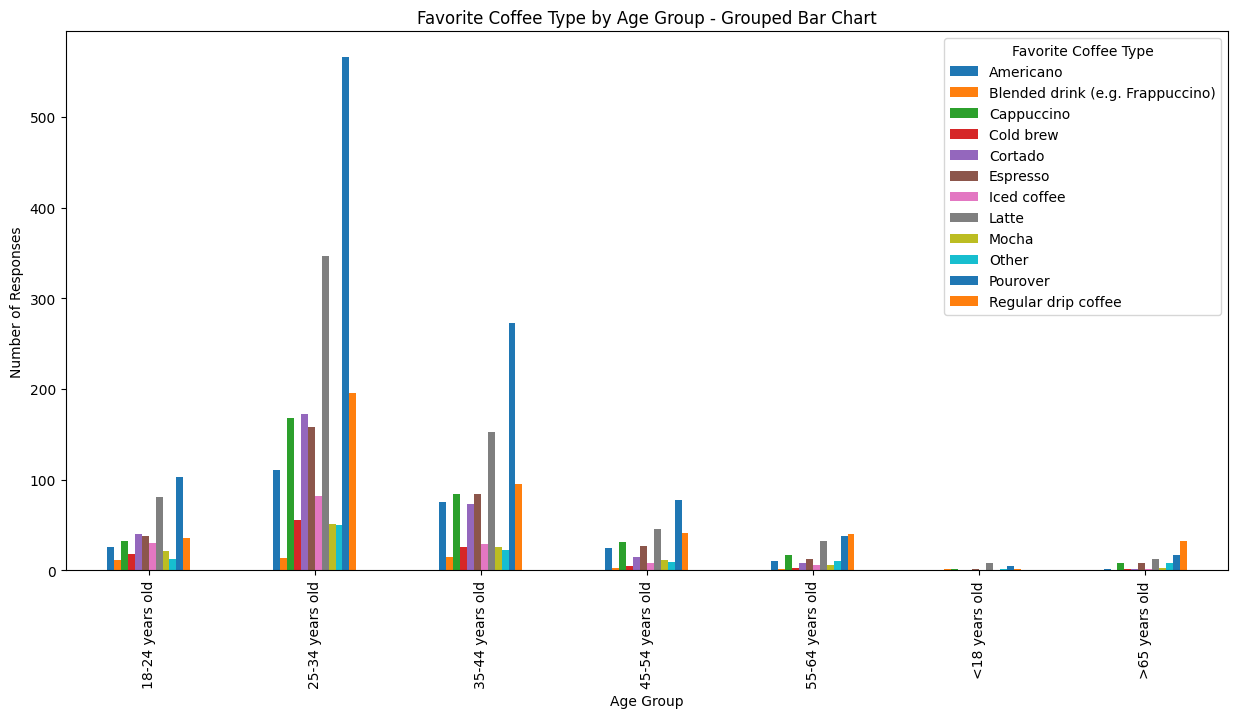

In [17]:
age_favorite_distribution.plot(kind='bar', figsize=(15, 7))
plt.title('Favorite Coffee Type by Age Group - Grouped Bar Chart')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.legend(title='Favorite Coffee Type')
plt.show()


# age_additions_distribution

In [18]:
age_additions_distribution = df.groupby(['age', 'additions']).size().unstack().fillna(0)
age_additions_distribution

additions,Flavor syrup,"Flavor syrup, Milk, dairy alternative, or coffee creamer","Flavor syrup, Milk, dairy alternative, or coffee creamer, Sugar or sweetener","Flavor syrup, Sugar or sweetener, Milk, dairy alternative, or coffee creamer","Milk, dairy alternative, or coffee creamer","Milk, dairy alternative, or coffee creamer, Flavor syrup","Milk, dairy alternative, or coffee creamer, Flavor syrup, No - just black","Milk, dairy alternative, or coffee creamer, No - just black","Milk, dairy alternative, or coffee creamer, No - just black, Sugar or sweetener","Milk, dairy alternative, or coffee creamer, Other",...,"Flavor syrup, Sugar or sweetener, Milk, dairy alternative, or coffee creamer, No - just black, Other","Milk, dairy alternative, or coffee creamer, Flavor syrup, Sugar or sweetener","Milk, dairy alternative, or coffee creamer, Other, No - just black","Milk, dairy alternative, or coffee creamer, Sugar or sweetener, Flavor syrup, Other","No - just black, Cinnamon","No - just black, Other, Milk, dairy alternative, or coffee creamer, Flavor syrup, Sugar or sweetener","Sugar or sweetener, Milk, dairy alternative, or coffee creamer, No - just black, Flavor syrup","Sugar or sweetener, Other",Half & half,"No - just black, Milk, dairy alternative, or coffee creamer, Other, Flavor syrup"
age,,,,,,,,,,,,,,,,,,,,,
18-24 years old,4.0,5.0,1.0,1.0,73.0,11.0,1.0,5.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25-34 years old,2.0,11.0,0.0,2.0,355.0,48.0,2.0,41.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35-44 years old,0.0,4.0,0.0,0.0,194.0,10.0,0.0,18.0,0.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
45-54 years old,0.0,0.0,0.0,1.0,64.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-64 years old,0.0,0.0,0.0,1.0,53.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
<18 years old,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
>65 years old,0.0,0.0,0.0,0.0,28.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# age_additions_distribution (additions)

In [19]:
top_additions = df['additions'].value_counts().nlargest(5).index
df_top_additions = df[df['additions'].isin(top_additions)]
age_additions_distribution = df_top_additions.groupby(['age', 'additions']).size().unstack().fillna(0)
age_additions_distribution

additions,"Milk, dairy alternative, or coffee creamer","Milk, dairy alternative, or coffee creamer, Flavor syrup","Milk, dairy alternative, or coffee creamer, Sugar or sweetener",No - just black,"No - just black, Milk, dairy alternative, or coffee creamer"
age,,,,,
18-24 years old,73,11,33,228,28
25-34 years old,355,48,98,1134,149
35-44 years old,194,10,73,512,64
45-54 years old,64,1,37,149,21
55-64 years old,53,2,23,74,7
<18 years old,3,1,3,5,1
>65 years old,28,3,5,46,3


# barplot (Top 5 Coffee Additions by Age Group)

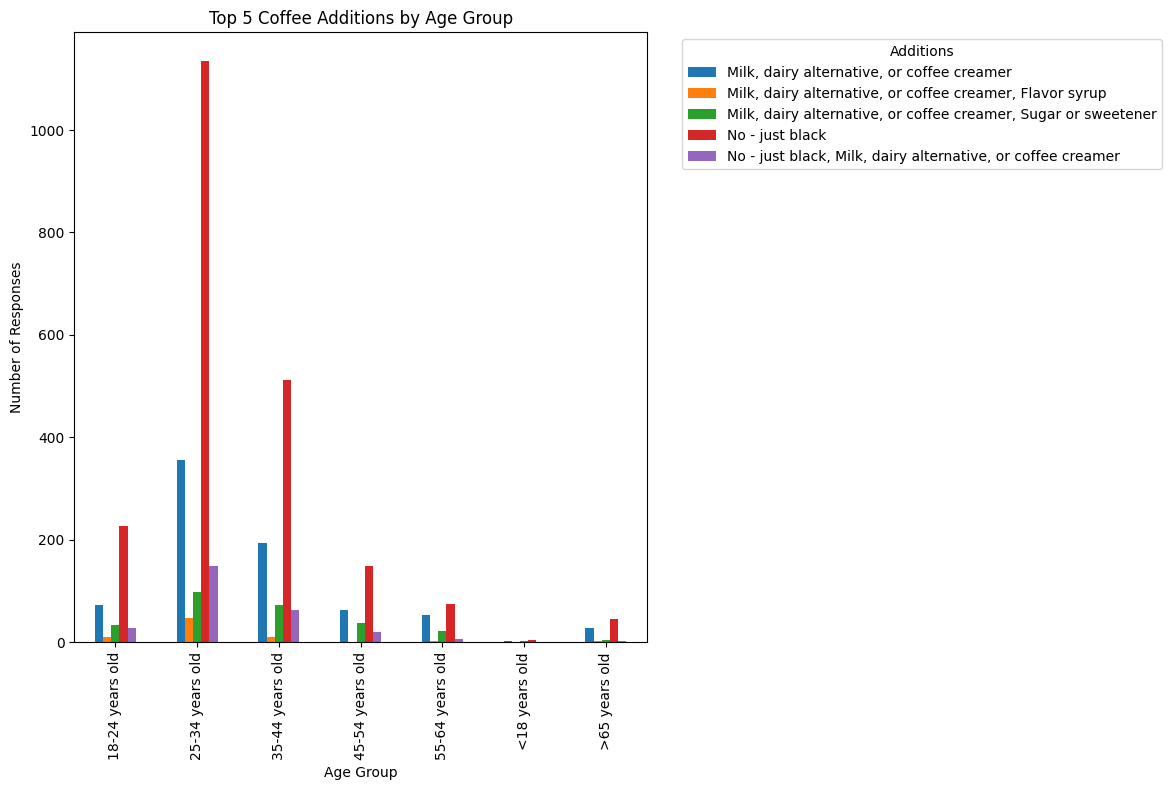

In [20]:
age_additions_distribution.plot(kind='bar', figsize=(12, 8))
plt.title('Top 5 Coffee Additions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.legend(title='Additions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# age_where_drink_distribution

In [21]:
age_where_drink_distribution = df.groupby(['age', 'where_drink']).size().unstack().fillna(0)
age_where_drink_distribution

where_drink,At a cafe,"At a cafe, At home","At a cafe, At home, At the office","At a cafe, At home, At the office, On the go","At a cafe, At home, On the go","At a cafe, At home, On the go, At the office","At a cafe, At the office","At a cafe, At the office, At home","At a cafe, At the office, At home, On the go","At a cafe, At the office, On the go",...,"On the go, At a cafe, At the office, At home","On the go, At home","On the go, At home, At a cafe","On the go, At home, At a cafe, At the office","On the go, At home, At the office","On the go, At home, At the office, At a cafe","On the go, At the office","On the go, At the office, At a cafe, At home","On the go, At the office, At home","On the go, At the office, At home, At a cafe"
age,,,,,,,,,,,,,,,,,,,,,
18-24 years old,13.0,23.0,3.0,1.0,3.0,1.0,1.0,5.0,1.0,1.0,...,1.0,6.0,5.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0
25-34 years old,42.0,41.0,9.0,3.0,9.0,2.0,3.0,9.0,2.0,0.0,...,1.0,16.0,6.0,3.0,5.0,5.0,5.0,2.0,7.0,0.0
35-44 years old,10.0,16.0,3.0,2.0,1.0,3.0,0.0,3.0,1.0,0.0,...,0.0,7.0,5.0,1.0,5.0,2.0,0.0,0.0,3.0,0.0
45-54 years old,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
55-64 years old,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
<18 years old,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
>65 years old,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# age_where_drink_top5

In [22]:
age_where_drink_counts = df.groupby(['age', 'where_drink']).size().unstack().fillna(0)
top_places = age_where_drink_counts.sum().nlargest(5).index
age_where_drink_top5 = age_where_drink_counts[top_places]
age_where_drink_top5

where_drink,At home,"At home, At a cafe","At home, At the office","At the office, At home",At the office
age,,,,,
18-24 years old,149.0,56.0,33.0,19.0,17.0
25-34 years old,708.0,228.0,208.0,127.0,67.0
35-44 years old,399.0,98.0,115.0,55.0,36.0
45-54 years old,174.0,23.0,23.0,16.0,10.0
55-64 years old,113.0,7.0,24.0,9.0,7.0
<18 years old,9.0,1.0,0.0,0.0,0.0
>65 years old,69.0,3.0,2.0,3.0,4.0


# barplot (Top 5 Places Where People Drink Coffee by Age Group)

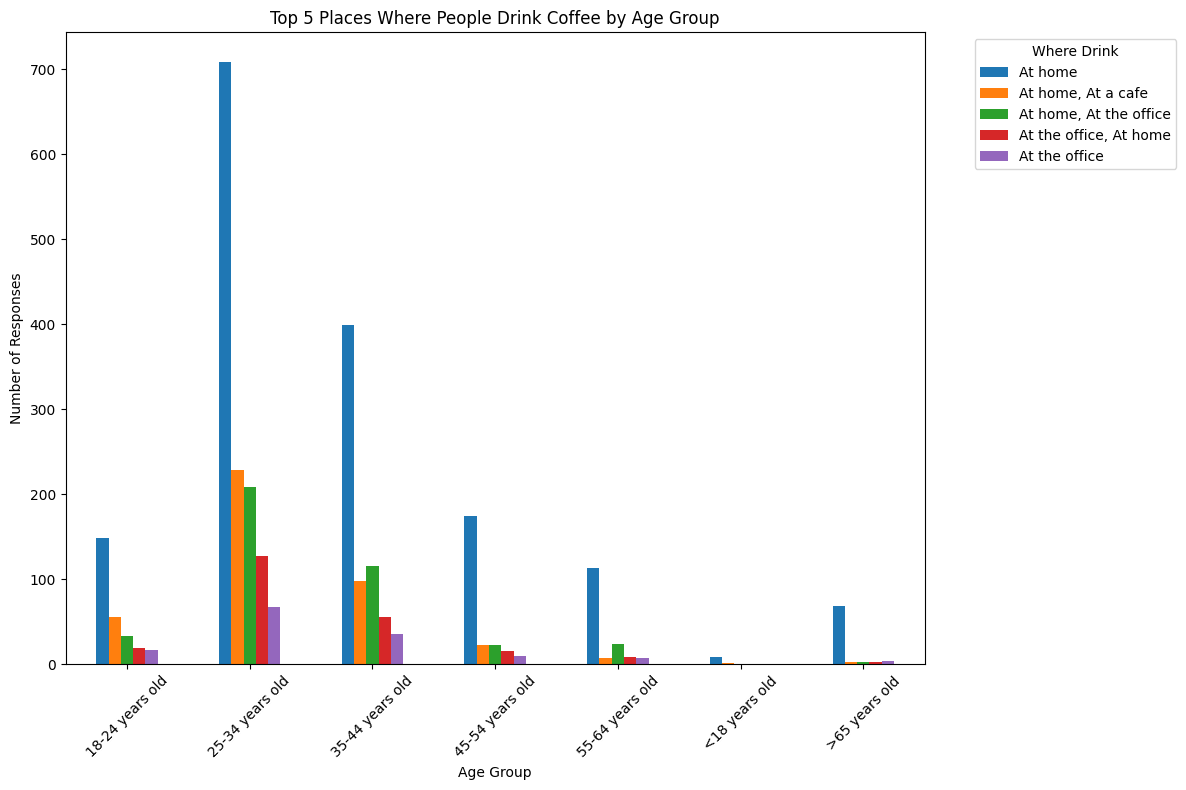

In [23]:
age_where_drink_top5.plot(kind='bar', figsize=(12, 8))
plt.title('Top 5 Places Where People Drink Coffee by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.legend(title='Where Drink', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# age_at_cafe_counts

In [24]:
age_at_cafe_counts = df[df['where_drink'] == 'At a cafe'].groupby('age').size()
age_at_cafe_counts

age
18-24 years old    13
25-34 years old    42
35-44 years old    10
45-54 years old     2
>65 years old       3
dtype: int64

# pie chart (Distribution of Drinking Coffee at a Café by Age Group)

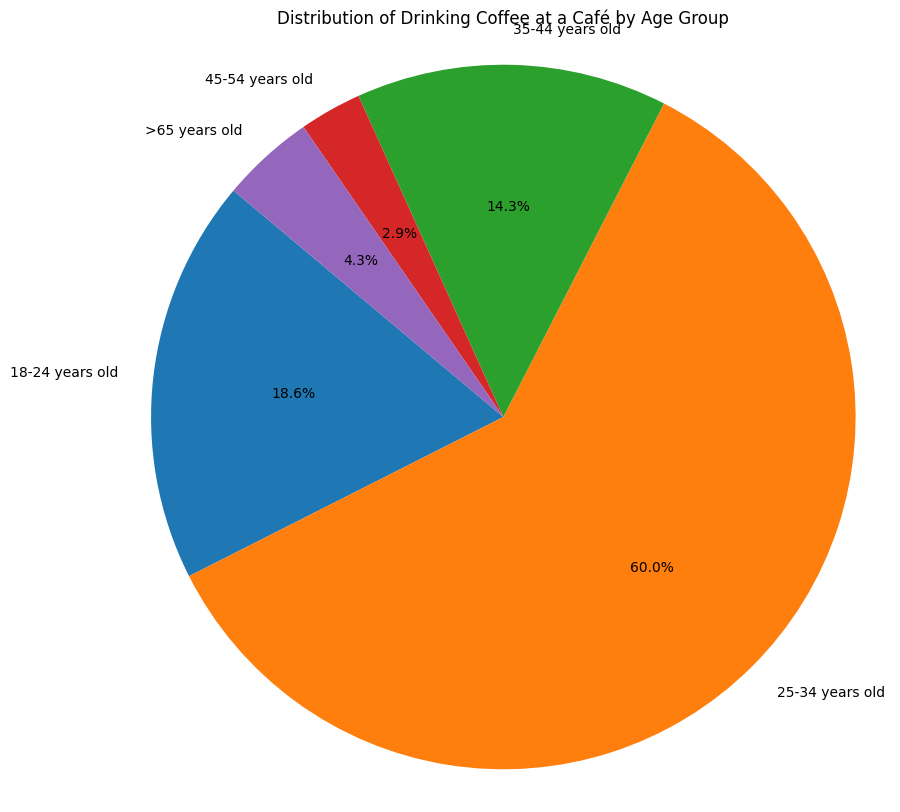

In [25]:
plt.figure(figsize=(10, 10))
plt.pie(age_at_cafe_counts, labels=age_at_cafe_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Drinking Coffee at a Café by Age Group')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle
plt.show()

# cup_favorite_counts

In [26]:
cup_favorite_counts = df.groupby(['cups', 'favorite']).size().reset_index(name='count')
most_count_cup = cup_favorite_counts.loc[cup_favorite_counts['count'].idxmax()]
most_count_cup

cups               2
favorite    Pourover
count            534
Name: 22, dtype: object

# top_5_cups (favorite)

In [27]:
top_5_cups = df['cups'].value_counts().nlargest(5).index
df_top_5_cups = df[df['cups'].isin(top_5_cups)]
cup_favorite_counts = df_top_5_cups.groupby(['cups', 'favorite']).size().unstack(fill_value=0)
cup_favorite_counts

favorite,Americano,Blended drink (e.g. Frappuccino),Cappuccino,Cold brew,Cortado,Espresso,Iced coffee,Latte,Mocha,Other,Pourover,Regular drip coffee
cups,,,,,,,,,,,,
1,78,7,106,38,104,79,59,281,53,43,298,127
2,100,9,149,36,134,135,54,237,33,38,534,193
3,33,1,30,11,40,71,13,51,8,5,149,56
4,19,0,9,3,7,15,1,9,3,0,33,22
Less than 1,10,28,43,20,15,15,23,91,20,23,37,20


# pourover_age_counts

In [28]:
df_pourover = df[df['favorite'] == 'Pourover']
pourover_age_counts = df_pourover['age'].value_counts()
pourover_age_counts = pourover_age_counts.sort_index()
pourover_age_counts

age
18-24 years old    103
25-34 years old    566
35-44 years old    273
45-54 years old     78
55-64 years old     38
<18 years old        5
>65 years old       17
Name: count, dtype: int64

# piechart(Distribution of Pourover Coffee Preference by Age Group)

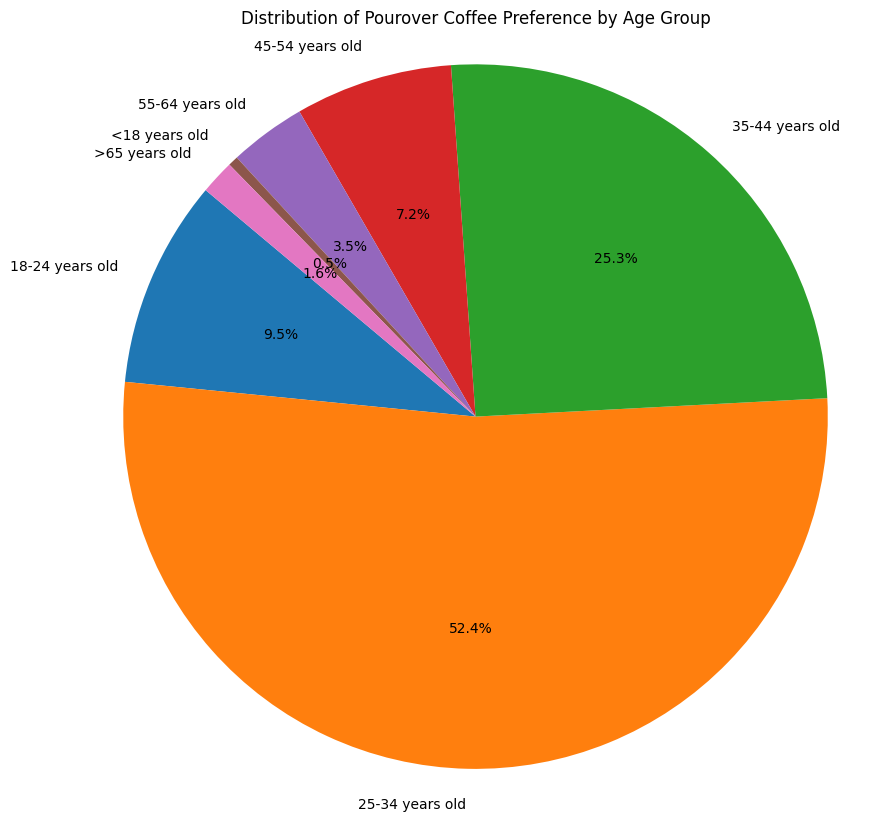

In [29]:
plt.figure(figsize=(10, 10))
plt.pie(pourover_age_counts, labels=pourover_age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pourover Coffee Preference by Age Group')
plt.axis('equal')
plt.show()